In [1]:
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# DATA PREPROCESSING

In [4]:
X_train.shape
# We would have to add the color channel data(here 1 => grayscale)

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

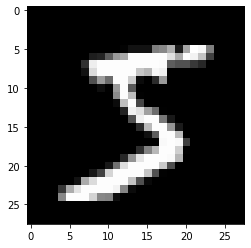

In [7]:
plt.imshow(single_image, cmap='gray')

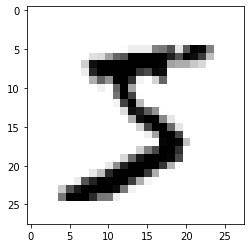

In [8]:
plt.imshow(single_image, cmap='gray_r')

In [9]:
y_train
# we see the first is a 5

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# But we need to convert them into OneHotEncoding cause these are Categorical Data
from keras.utils.np_utils import to_categorical

In [11]:
y_trainc = to_categorical(y_train)
y_testc = to_categorical(y_test)

In [12]:
y_trainc.shape

(60000, 10)

In [13]:
y_trainc

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_trainc[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
X_train.max()

255

In [16]:
X_train = X_train / X_train.max()
X_test = X_test / X_train.max()

In [17]:
X_train.max()

1.0

In [18]:
single_image = X_train[0]
single_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

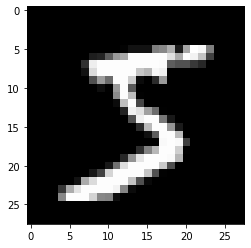

In [19]:
plt.imshow(single_image, cmap='gray')

In [20]:
# Reshaping the data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000,28,28,1)

# BUILDING THE MODEL

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


# TRAINING THE MODEL

In [24]:
model.fit(X_train,y_trainc,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1415 - accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0343 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0261 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0209 - accuracy: 0.9941


# MODEL EVALUATION

In [25]:
model.evaluate(X_test,y_testc)

313/313 [==============================] - 1s 5ms/step - loss: 230.5360 - accuracy: 0.9025


[230.53598022460938, 0.9024999737739563]

# MODEL PREDICTION

In [26]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       980
           1       0.97      0.98      0.97      1135
           2       0.95      0.92      0.93      1032
           3       1.00      0.57      0.73      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.86      0.91       892
           6       0.93      0.98      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.64      0.97      0.77       974
           9       0.99      0.84      0.91      1009

    accuracy                           0.90     10000
   macro avg       0.92      0.90      0.90     10000
weighted avg       0.92      0.90      0.90     10000

